# Setup

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import os

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder

# Análise exploratória

## Leitura dos arquivos

In [3]:
train_df = pd.read_csv('https://drive.google.com/uc?id=1wxCp6PAORF3Aqvodz0hiYGq0s-U87JZs')
test_df = pd.read_csv('https://drive.google.com/uc?id=1ukd3fPEjolsCFSCqZGltCe37VZfFIBCv')

In [4]:
train_df.head()

,id,age,job,marital,education,location,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,41.0,management,single,tertiary,NaN,no,4522.0,no,no,cellular,28,aug,55,1.0,-1,0.0,unknown,no
1,1,42.0,blue-collar,married,primary,NaN,yes,398.0,yes,n,unknown,16,may,251,4.0,-1,0.0,unknown,no
2,2,26.0,student,single,secondary,Lisboa,no,706.0,no,no,unknown,8,oct,118,1.0,105,2.0,other,no
3,3,54.0,management,married,tertiary,NaN,no,0.0,no,y,cellular,19,nov,307,3.0,-1,0.0,unknown,no
4,4,43.0,self-employed,married,secondary,Porto,no,918.0,yes,no,unknown,6,may,193,1.0,-1,0.0,unknown,no


In [5]:
test_df.head()

,id,age,job,marital,education,location,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,40000,26.0,self-employed,single,tertiary,Porto,no,-101.0,no,yes,cellular,29,jan,172,1.0,-1,0.0,unknown
1,40001,47.0,technician,married,secondary,NaN,no,1167.0,yes,no,cellular,2,feb,139,3.0,73,2.0,success
2,40002,35.0,self-employed,married,tertiary,NaN,no,2427.0,no,no,cellular,12,jul,210,3.0,158,7.0,other
3,40003,54.0,technician,divorced,secondary,NaN,no,NaN,no,no,cellular,30,jan,86,1.0,-1,0.0,unknown
4,40004,27.0,blue-collar,single,secondary,Braga,no,-208.0,yes,n,unknown,21,may,127,2.0,-1,0.0,unknown


## Verificação de duplicatas

In [6]:
print(train_df.duplicated(keep='first').sum())
print(test_df.duplicated(keep='first').sum())

0
0


## Verificação do tipo de dados

Vemos que há 4 features como int, 10 como objetos (excluindo a target) e 4 como float, o que é bem estranho para age, campaign e previous.

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         40000 non-null  int64  
 1   age        38801 non-null  float64
 2   job        38651 non-null  object 
 3   marital    39903 non-null  object 
 4   education  40000 non-null  object 
 5   location   18498 non-null  object 
 6   default    40000 non-null  object 
 7   balance    38208 non-null  float64
 8   housing    40000 non-null  object 
 9   loan       40000 non-null  object 
 10  contact    39266 non-null  object 
 11  day        40000 non-null  int64  
 12  month      40000 non-null  object 
 13  duration   40000 non-null  int64  
 14  campaign   38603 non-null  float64
 15  pdays      40000 non-null  int64  
 16  previous   39703 non-null  float64
 17  poutcome   40000 non-null  object 
 18  y          40000 non-null  object 
dtypes: float64(4), int64(4), object(11)
memory usa

In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5211 entries, 0 to 5210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         5211 non-null   int64  
 1   age        5045 non-null   float64
 2   job        5055 non-null   object 
 3   marital    5192 non-null   object 
 4   education  5211 non-null   object 
 5   location   2449 non-null   object 
 6   default    5211 non-null   object 
 7   balance    4964 non-null   float64
 8   housing    5211 non-null   object 
 9   loan       5211 non-null   object 
 10  contact    5121 non-null   object 
 11  day        5211 non-null   int64  
 12  month      5211 non-null   object 
 13  duration   5211 non-null   int64  
 14  campaign   5022 non-null   float64
 15  pdays      5211 non-null   int64  
 16  previous   5172 non-null   float64
 17  poutcome   5211 non-null   object 
dtypes: float64(4), int64(4), object(10)
memory usage: 732.9+ KB


## Verificação de dados faltantes

Há uma presença significativa de dados faltantes em nosso dataset, como podemos ver em location, balance e entre outras features. Estratégias como imputação por média, mediana ou moda, remoção de feature e imputação por modelos podem ser adotadas.

In [9]:
train_df.isna().sum()

id               0
age           1199
job           1349
marital         97
education        0
location     21502
default          0
balance       1792
housing          0
loan             0
contact        734
day              0
month            0
duration         0
campaign      1397
pdays            0
previous       297
poutcome         0
y                0
dtype: int64

In [10]:
train_df.describe(include=['object'])

,job,marital,education,location,default,housing,loan,contact,month,poutcome,y
count,38651,39903,40000,18498,40000,40000,40000,39266,40000,40000,40000
unique,13,3,4,6,2,2,4,3,12,4,2
top,blue-collar,married,secondary,Lisboa,no,yes,no,cellular,may,unknown,no
freq,8313,24009,20563,9261,39268,22213,23551,25447,12200,32662,35322


## Descrição das opções das features categóricas

Há algumas coisas estranhas, como o `y` e `n` da feature `loan` e `admin.` da feature `job`, que provavelmente representa a mesma coisa que `administrator`.

In [11]:
categorical_features = train_df.select_dtypes(include=['object']).columns.tolist()

for col in categorical_features:
  print(col)
  print(train_df[col].unique(), "\n")

job
['management' 'blue-collar' 'student' 'self-employed' 'technician'
 'administrator' 'retired' 'housemaid' 'services' 'unemployed' nan
 'admin.' 'unknown' 'entrepreneur'] 

marital
['single' 'married' 'divorced' nan] 

education
['tertiary' 'primary' 'secondary' 'unknown'] 

location
[nan 'Lisboa' 'Porto' 'Amadora' 'Braga' 'Coimbra' 'Faro'] 

default
['no' 'yes'] 

housing
['no' 'yes'] 

loan
['no' 'n' 'y' 'yes'] 

contact
['cellular' 'unknown' nan 'telephone'] 

month
['aug' 'may' 'oct' 'nov' 'jul' 'jun' 'apr' 'jan' 'feb' 'sep' 'mar' 'dec'] 

poutcome
['unknown' 'other' 'failure' 'success'] 

y
['no' 'yes'] 



In [12]:
categorical_features = test_df.select_dtypes(include=['object']).columns.tolist()

for col in categorical_features:
  print(col)
  print(train_df[col].unique(), "\n")

job
['management' 'blue-collar' 'student' 'self-employed' 'technician'
 'administrator' 'retired' 'housemaid' 'services' 'unemployed' nan
 'admin.' 'unknown' 'entrepreneur'] 

marital
['single' 'married' 'divorced' nan] 

education
['tertiary' 'primary' 'secondary' 'unknown'] 

location
[nan 'Lisboa' 'Porto' 'Amadora' 'Braga' 'Coimbra' 'Faro'] 

default
['no' 'yes'] 

housing
['no' 'yes'] 

loan
['no' 'n' 'y' 'yes'] 

contact
['cellular' 'unknown' nan 'telephone'] 

month
['aug' 'may' 'oct' 'nov' 'jul' 'jun' 'apr' 'jan' 'feb' 'sep' 'mar' 'dec'] 

poutcome
['unknown' 'other' 'failure' 'success'] 



## Visualização gráfica

job
blue-collar      8313
management       8093
technician       6512
services         3550
admin.           2718
retired          1947
administrator    1711
self-employed    1347
entrepreneur     1259
unemployed       1092
housemaid        1061
student           809
unknown           239
Name: count, dtype: int64


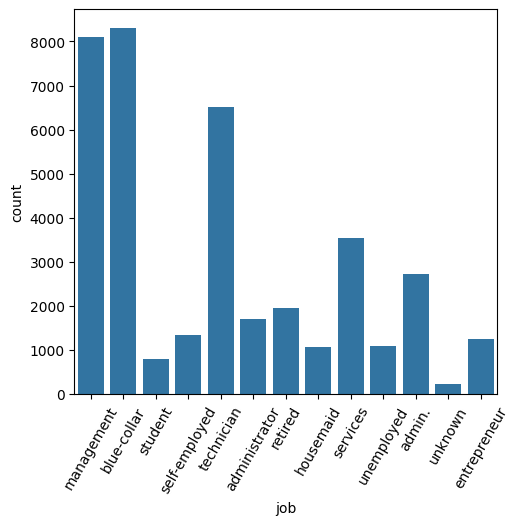

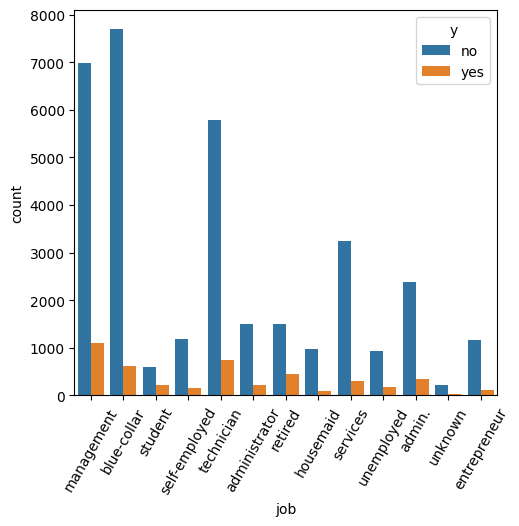

In [13]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.xticks(rotation=60)
sns.countplot(data=train_df, x='job')
plt.figure(figsize=(12,5))
plt.subplot(1,2,2)
plt.xticks(rotation=60)
sns.countplot(data=train_df, x='job', hue='y')

contagem_jobs = train_df['job'].value_counts()

print(contagem_jobs)

<Axes: xlabel='education', ylabel='count'>

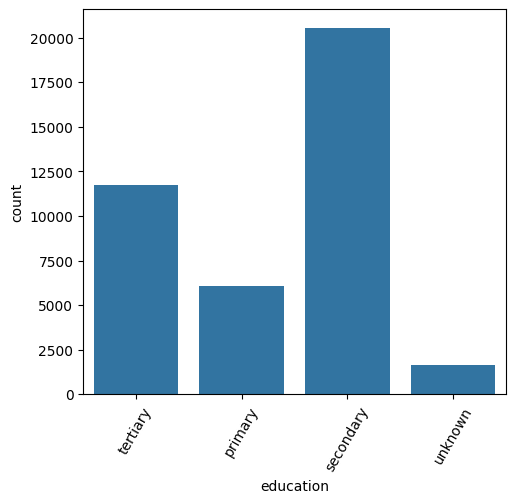

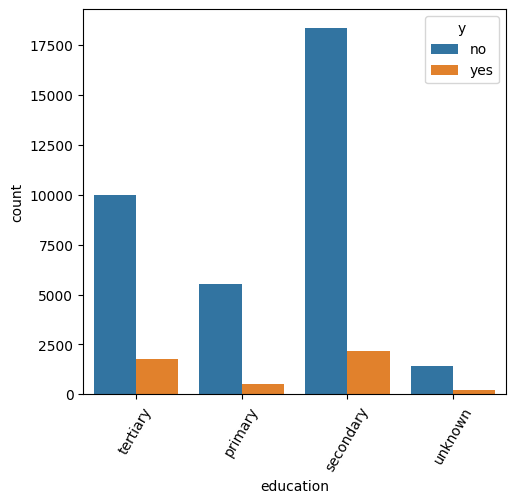

In [14]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.xticks(rotation=60)
sns.countplot(data=train_df, x='education')
plt.figure(figsize=(12,5))
plt.subplot(1,2,2)
plt.xticks(rotation=60)
sns.countplot(data=train_df, x='education', hue='y')

<Axes: xlabel='marital', ylabel='count'>

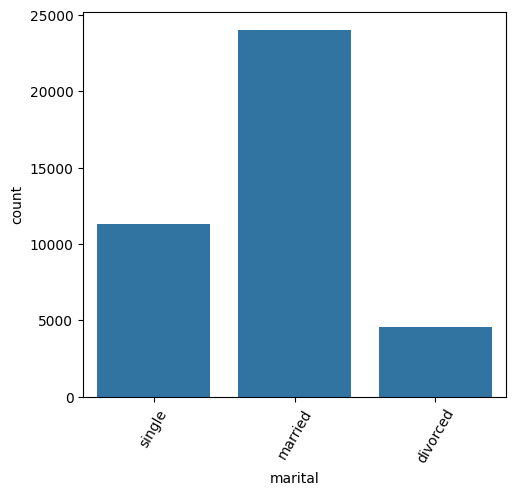

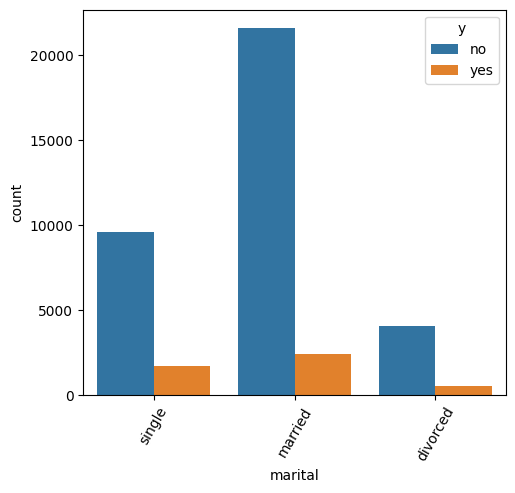

In [15]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.xticks(rotation=60)
sns.countplot(data=train_df, x='marital')
plt.figure(figsize=(12,5))
plt.subplot(1,2,2)
plt.xticks(rotation=60)
sns.countplot(data=train_df, x='marital', hue='y')

<Axes: xlabel='location', ylabel='count'>

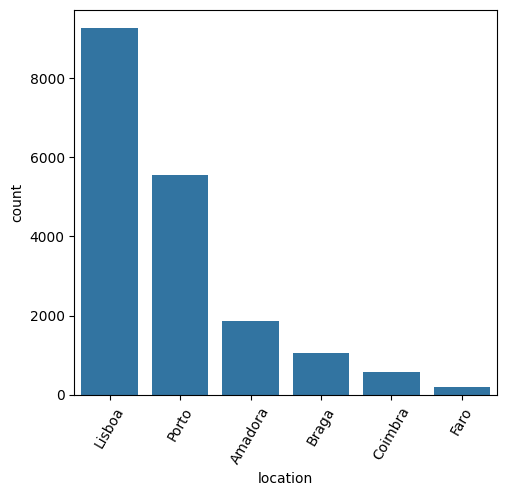

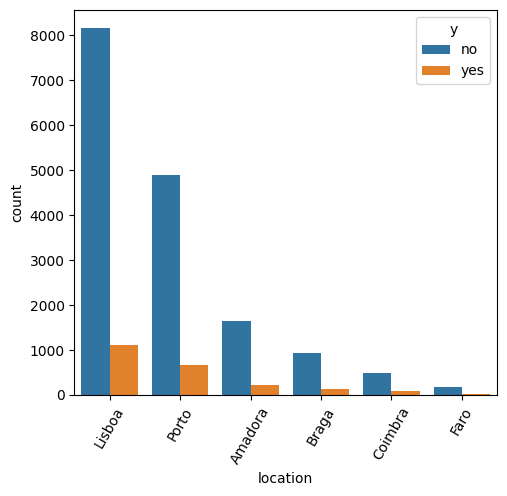

In [16]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.xticks(rotation=60)
sns.countplot(data=train_df, x='location')
plt.figure(figsize=(12,5))
plt.subplot(1,2,2)
plt.xticks(rotation=60)
sns.countplot(data=train_df, x='location', hue='y')

<Axes: xlabel='loan', ylabel='count'>

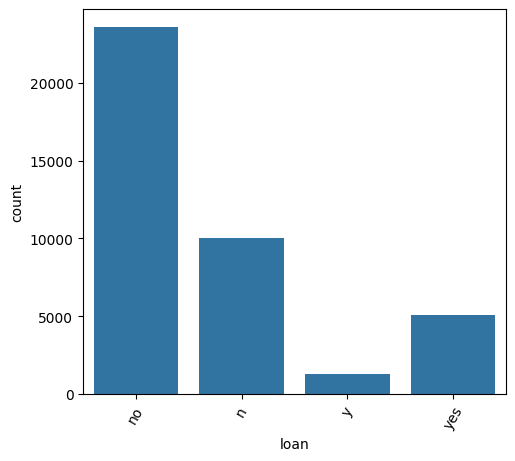

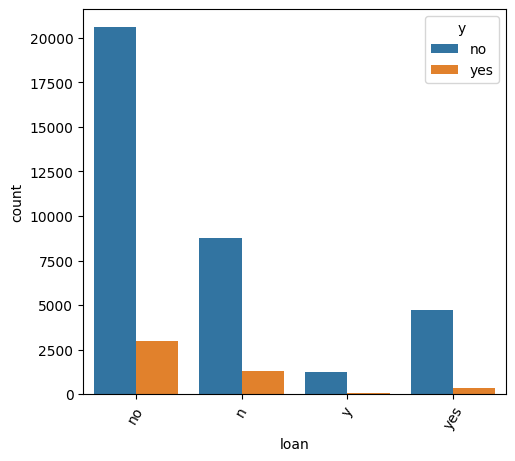

In [17]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.xticks(rotation=60)
sns.countplot(data=train_df, x='loan')
plt.figure(figsize=(12,5))
plt.subplot(1,2,2)
plt.xticks(rotation=60)
sns.countplot(data=train_df, x='loan', hue='y')

<Axes: xlabel='contact', ylabel='count'>

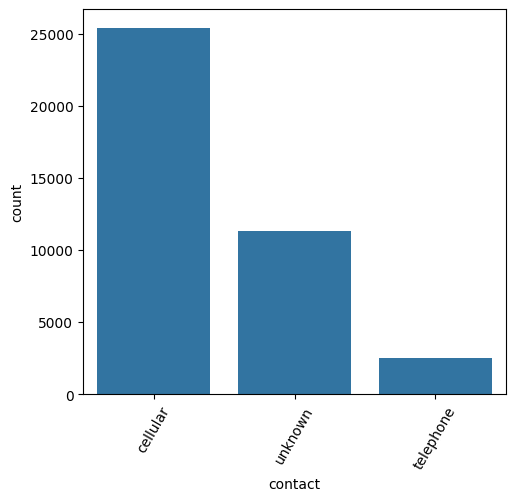

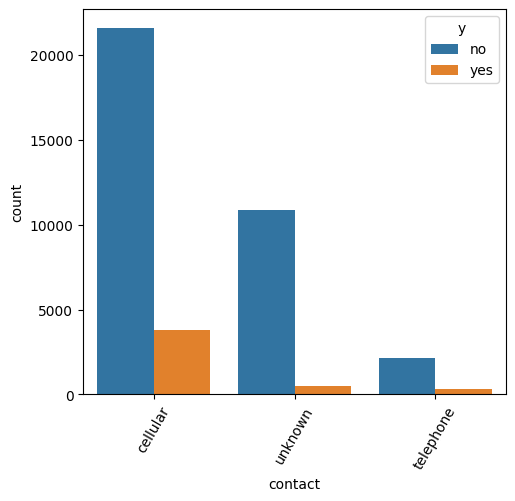

In [18]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.xticks(rotation=60)
sns.countplot(data=train_df, x='contact')
plt.figure(figsize=(12,5))
plt.subplot(1,2,2)
plt.xticks(rotation=60)
sns.countplot(data=train_df, x='contact', hue='y')

In [19]:
train_df.describe().round(2)

,id,age,balance,day,duration,campaign,pdays,previous
count,40000.00,38801.00,38208.00,40000.00,40000.00,38603.00,40000.00,39703.00
mean,19999.50,40.96,1364.65,15.82,380.42,2.75,40.36,0.58
std,11547.15,11.03,3059.02,8.33,3044.41,3.04,100.29,2.34
min,0.00,8.00,-8019.00,1.00,-20.00,1.00,-1.00,0.00
25%,9999.75,33.00,73.00,8.00,102.00,1.00,-1.00,0.00
50%,19999.50,39.00,450.50,16.00,180.00,2.00,-1.00,0.00
75%,29999.25,48.00,1423.00,21.00,320.00,3.00,-1.00,0.00
max,39999.00,150.00,102127.00,31.00,75000.00,58.00,871.00,275.00


In [20]:
test_df.describe().round(2)

,id,age,balance,day,duration,campaign,pdays,previous
count,5211.00,5045.00,4964.00,5211.00,5211.00,5022.00,5211.00,5172.00
mean,42605.00,41.11,1381.65,15.70,470.18,2.85,38.92,0.54
std,1504.43,10.83,3147.08,8.28,4013.51,3.47,98.84,1.96
min,40000.00,8.00,-2093.00,1.00,-20.00,1.00,-1.00,0.00
25%,41302.50,33.00,69.00,8.00,101.00,1.00,-1.00,0.00
50%,42605.00,39.00,430.00,16.00,176.00,2.00,-1.00,0.00
75%,43907.50,49.00,1451.00,21.00,312.00,3.00,-1.00,0.00
max,45210.00,150.00,71188.00,31.00,75000.00,63.00,842.00,51.00


In [21]:
print(train_df["id"].nunique())
print(test_df["id"].nunique())

40000
5211


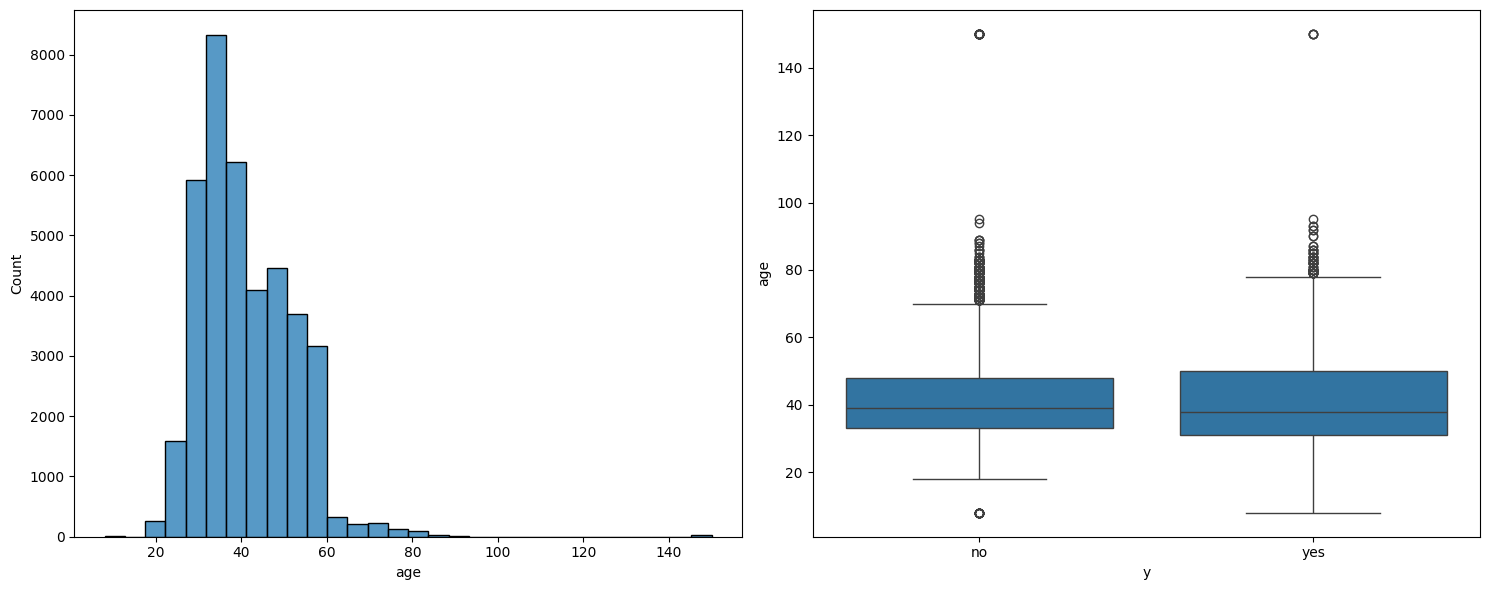

In [22]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=train_df, x='age', bins=30)

plt.subplot(1, 2, 2)
sns.boxplot(data=train_df, x='y', y='age')

plt.tight_layout()
plt.show()

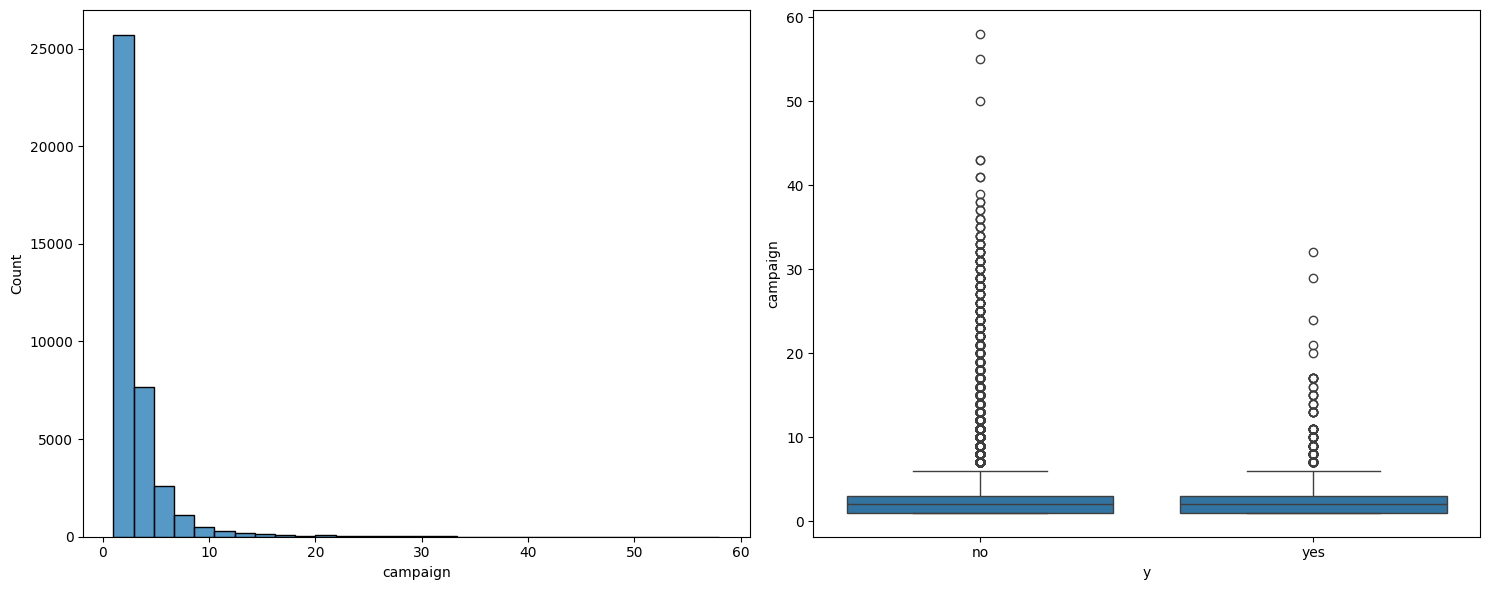

In [23]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=train_df, x='campaign', bins=30)

plt.subplot(1, 2, 2)
sns.boxplot(data=train_df, x='y', y='campaign')

plt.tight_layout()
plt.show()

In [24]:
# Strange ages

age_below_14 = train_df[train_df['age'] < 18].shape[0] # Some minors hire services with their parents' consent, but in this dataset, the quantity is very low
age_above_122 = train_df[train_df['age'] > 122].shape[0] # The oldest person who ever lived died at 122

print(f"Quantidade de pessoas com menos de 14 anos: {age_below_14}")
print(f"Quantidade de pessoas com mais de 122 anos: {age_above_122}")


Quantidade de pessoas com menos de 14 anos: 17
Quantidade de pessoas com mais de 122 anos: 27


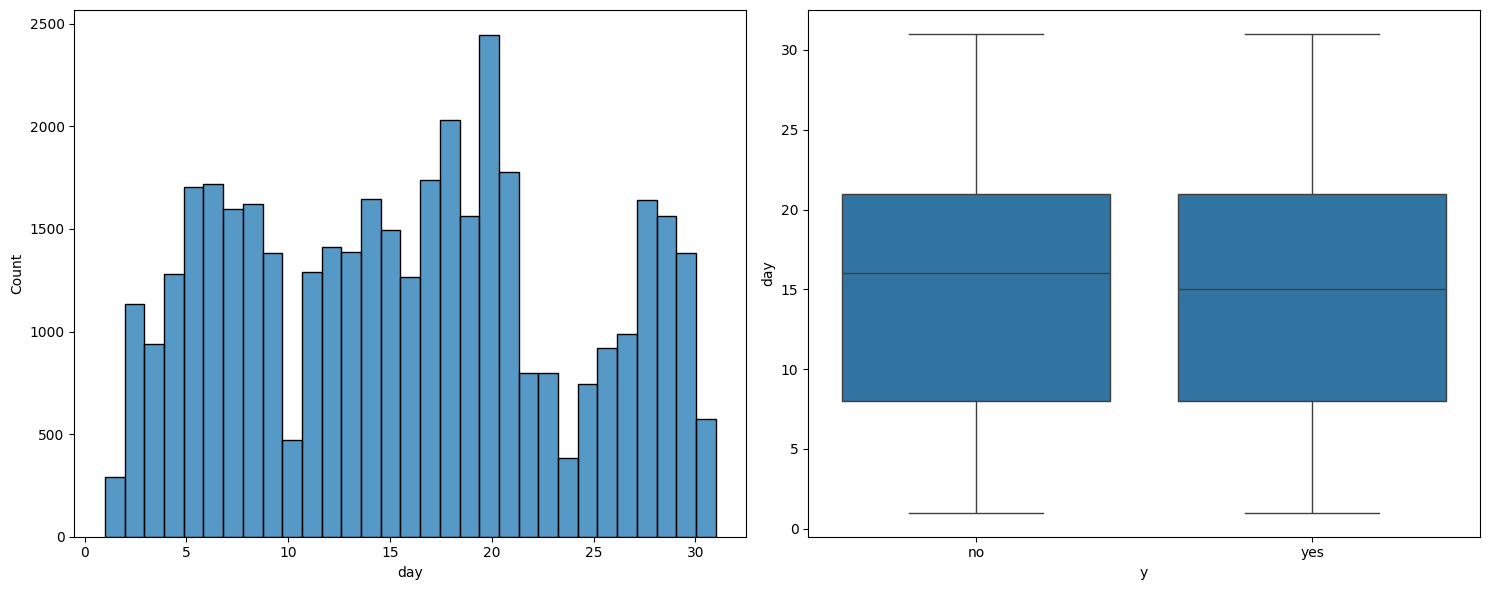

In [25]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=train_df, x='day', bins=31)

plt.subplot(1, 2, 2)
sns.boxplot(data=train_df, x='y', y='day')

plt.tight_layout()
plt.show()

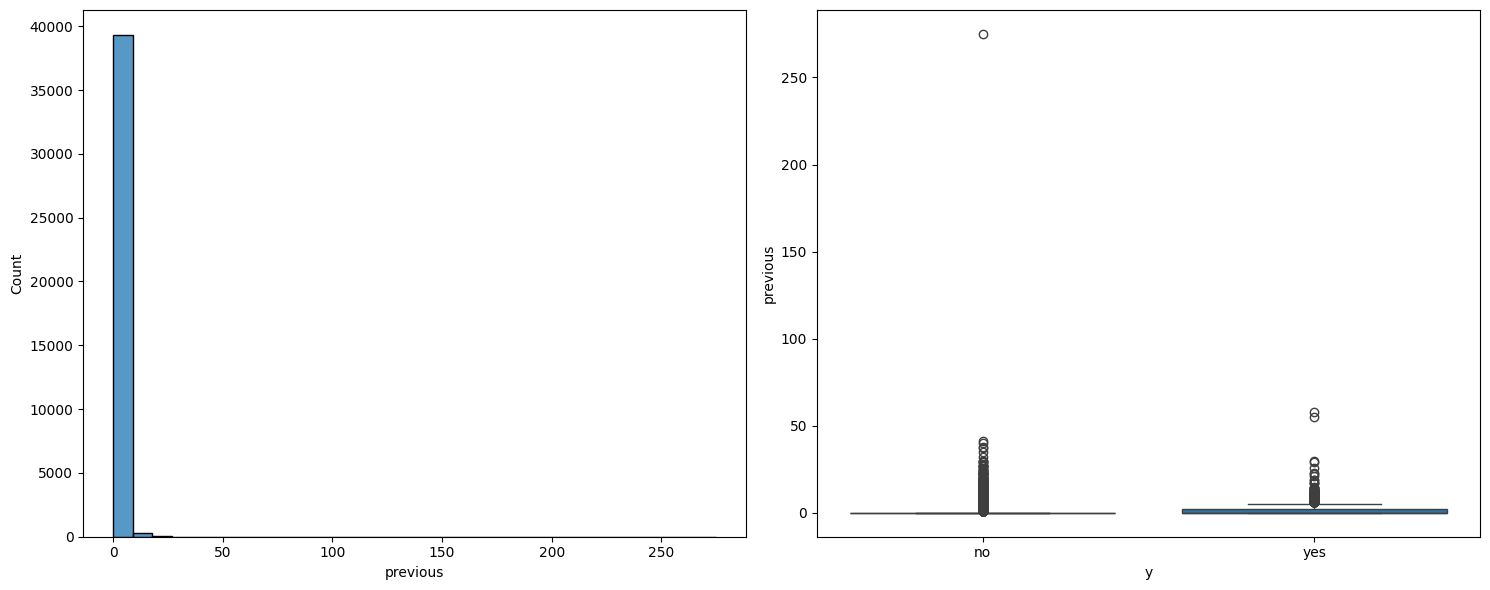

In [26]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=train_df, x='previous', bins=31)

plt.subplot(1, 2, 2)
sns.boxplot(data=train_df, x='y', y='previous')

plt.tight_layout()
plt.show()

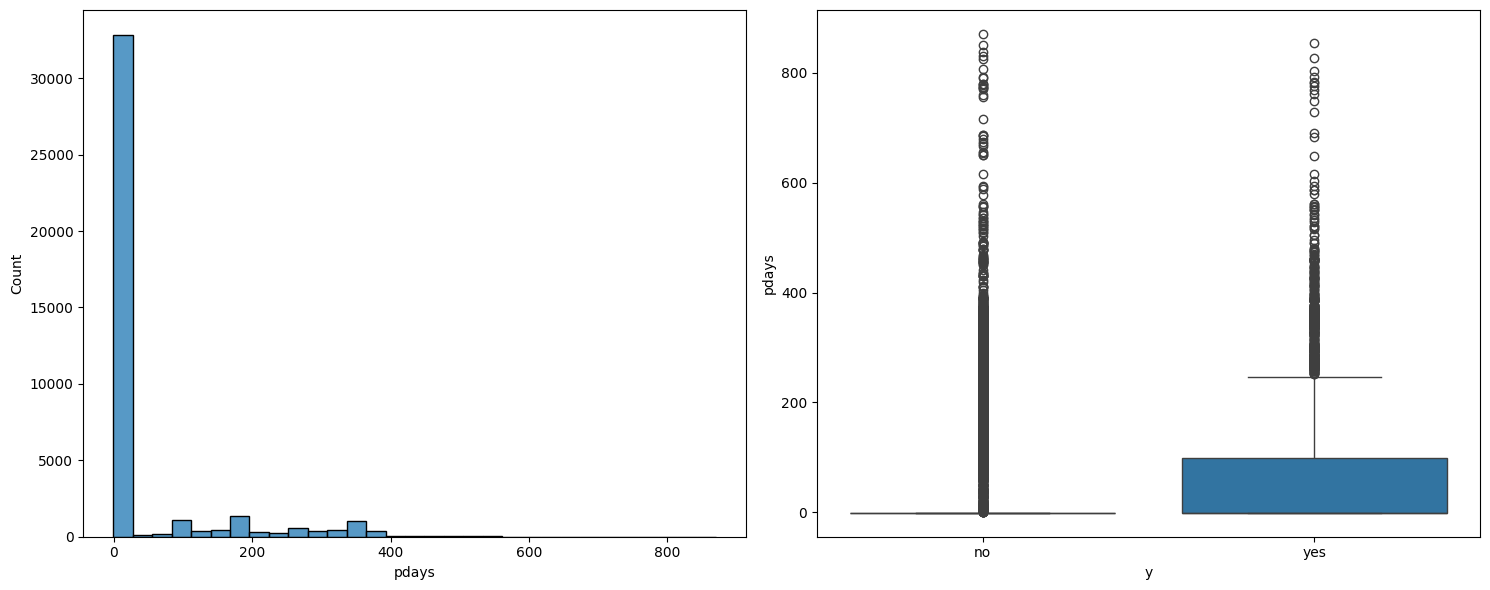

In [27]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=train_df, x='pdays', bins=31)

plt.subplot(1, 2, 2)
sns.boxplot(data=train_df, x='y', y='pdays')

plt.tight_layout()
plt.show()

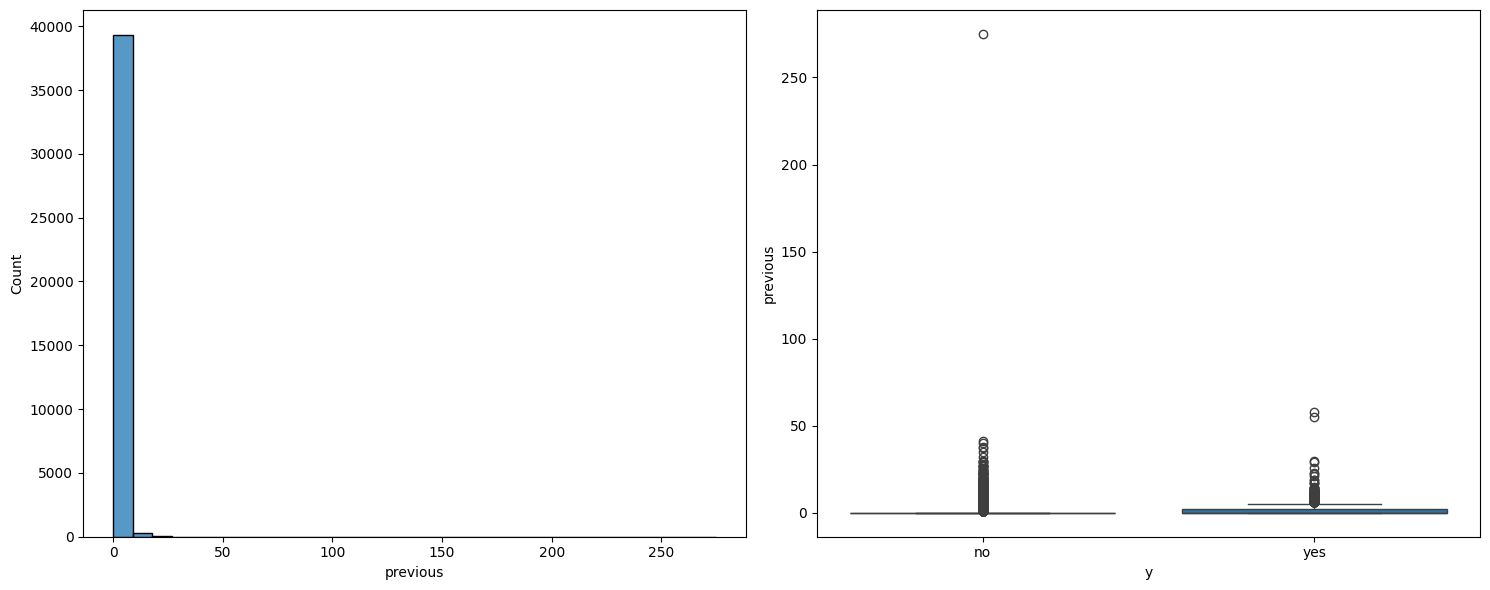

In [28]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=train_df, x='previous', bins=31)

plt.subplot(1, 2, 2)
sns.boxplot(data=train_df, x='y', y='previous')

plt.tight_layout()
plt.show()

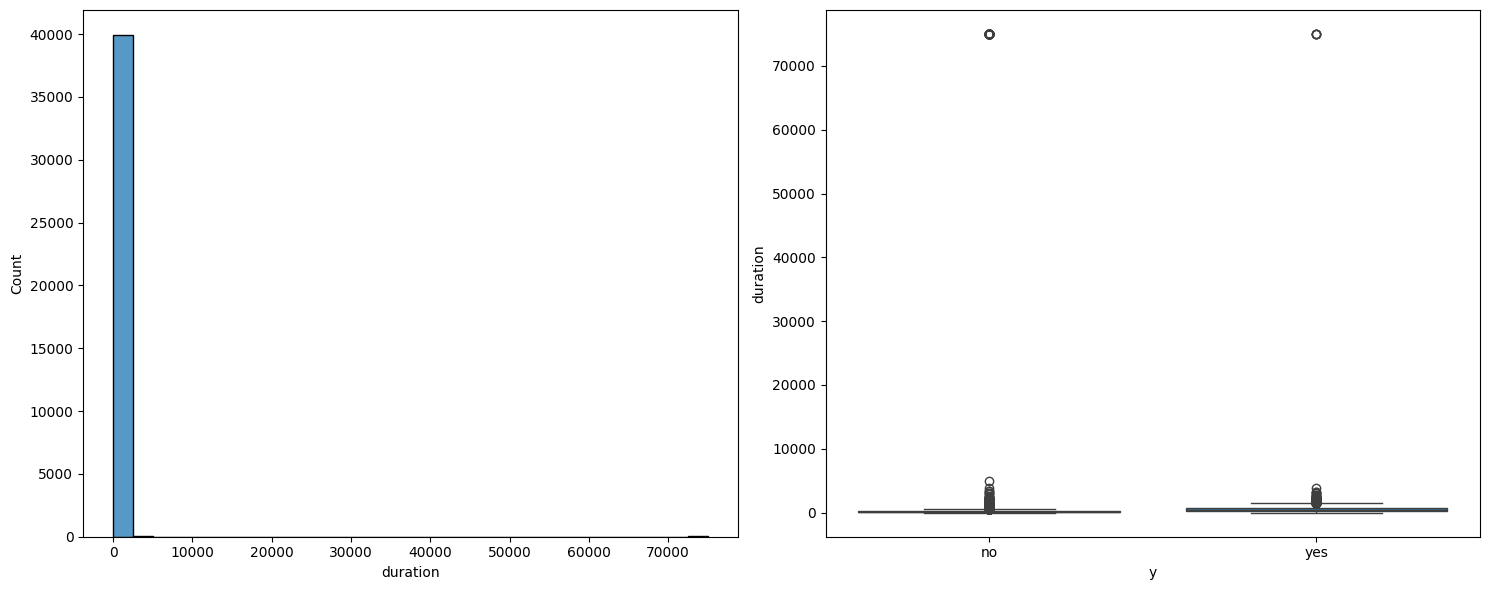

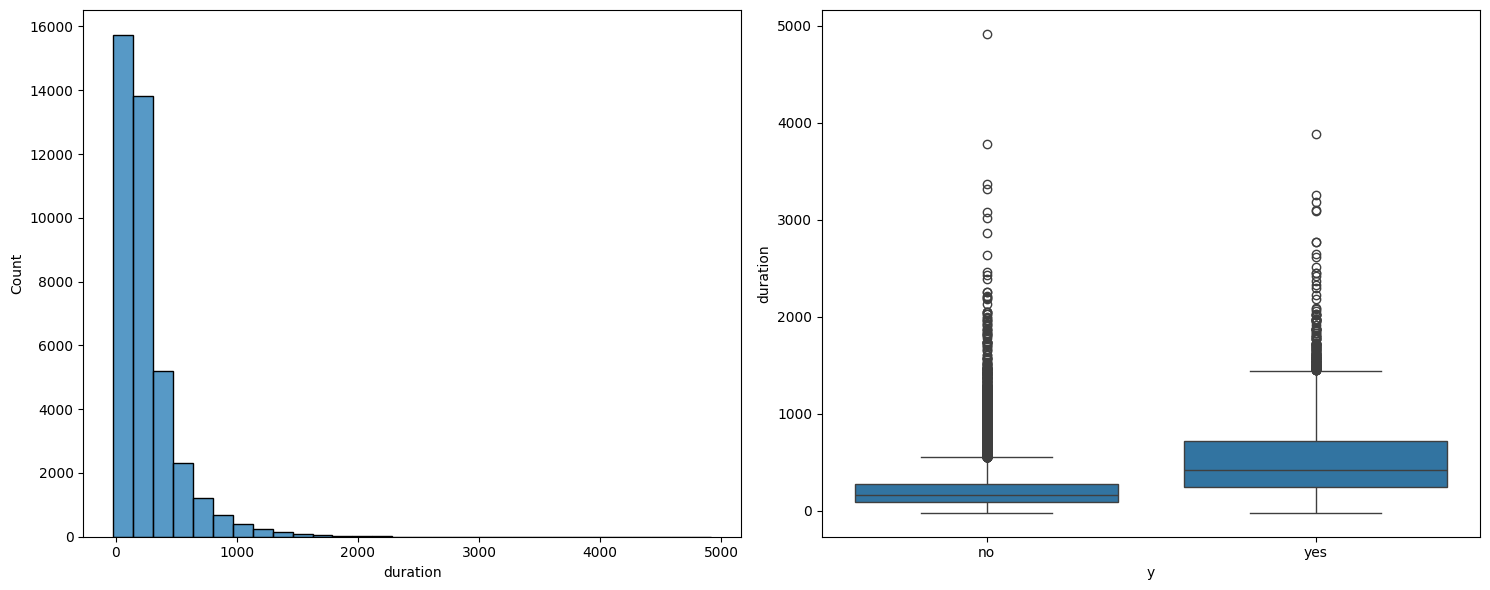

In [29]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=train_df[train_df["duration"] < 10**5], x='duration', bins=30)

plt.subplot(1, 2, 2)
sns.boxplot(data=train_df[train_df["duration"] < 10**5], x='y', y='duration')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=train_df[train_df["duration"] < 10**4], x='duration', bins=30)

plt.subplot(1, 2, 2)
sns.boxplot(data=train_df[train_df["duration"] < 10**4], x='y', y='duration')

plt.tight_layout()
plt.show()

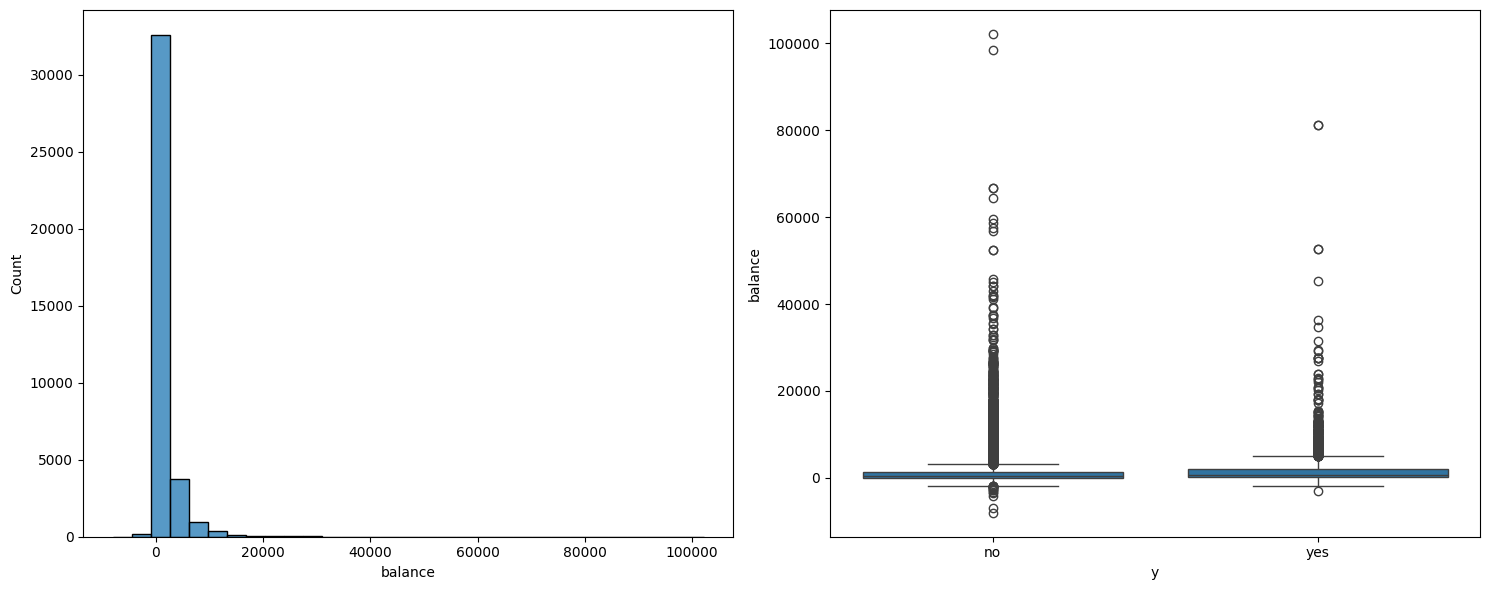

In [30]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(data=train_df, x='balance', bins=31)

plt.subplot(1, 2, 2)
sns.boxplot(data=train_df, x='y', y='balance')

plt.tight_layout()
plt.show()

# Limpeza

In [31]:
train_cleaning = train_df.copy()
test_cleaning = test_df.copy()

## Replace de dados inconsistentes

Como dito anteriormente, as features `job` e `loan` possuem dados redundantes e que devem ser corrigidos.

In [32]:
train_cleaning["job"] = train_df["job"].replace({"admin.": "administrator"})
train_cleaning["loan"] = train_df["loan"].replace({"n": "no", "y": "yes"})

test_cleaning["job"] = test_df["job"].replace({"admin.": "administrator"})
test_cleaning["loan"] = test_df["loan"].replace({"n": "no", "y": "yes"})

print(f'Dataset de treino \n{train_cleaning["loan"].value_counts()}')
print(f'\nDataset de teste \n{test_cleaning["loan"].value_counts()}')

Dataset de treino 
loan
no     33584
yes     6416
Name: count, dtype: int64

Dataset de teste 
loan
no     4383
yes     828
Name: count, dtype: int64


## Imputação de dados faltantes

### Imputação por moda

Em casos em que os dados faltantes são em pequena quantidade, até menos de 3%, a moda pode ser uma boa opção de imputação, e decidimos seguir essa estratégia para as features `marital`, `contact` e `previous`.

In [33]:
def impute_mode(df, feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)
    print(f'{df[feature].value_counts()}\n')

In [34]:
impute_mode(train_cleaning, 'marital')
impute_mode(test_cleaning, 'marital')

marital
married     24106
single      11313
divorced     4581
Name: count, dtype: int64

marital
married     3147
single      1447
divorced     617
Name: count, dtype: int64



In [35]:
impute_mode(train_cleaning, 'contact')
impute_mode(test_cleaning, 'contact')

contact
cellular     26181
unknown      11318
telephone     2501
Name: count, dtype: int64

contact
cellular     3404
unknown      1454
telephone     353
Name: count, dtype: int64



In [36]:
impute_mode(train_cleaning, 'previous')
impute_mode(test_cleaning, 'previous')

previous
0.0      32705
1.0       2434
2.0       1867
3.0        998
4.0        640
5.0        410
6.0        240
7.0        186
8.0        124
9.0         77
10.0        59
11.0        55
12.0        40
13.0        35
14.0        18
15.0        17
17.0        14
16.0        12
19.0        11
20.0         7
23.0         6
18.0         6
22.0         6
27.0         5
21.0         4
24.0         4
29.0         3
30.0         3
25.0         2
26.0         2
37.0         1
58.0         1
38.0         1
35.0         1
55.0         1
28.0         1
40.0         1
275.0        1
41.0         1
32.0         1
Name: count, dtype: int64

previous
0.0     4305
1.0      319
2.0      230
3.0      136
4.0       62
5.0       49
6.0       37
7.0       18
9.0       14
11.0      10
10.0       7
8.0        5
12.0       3
15.0       2
23.0       2
13.0       2
51.0       1
24.0       1
20.0       1
16.0       1
29.0       1
28.0       1
17.0       1
38.0       1
14.0       1
37.0       1
Name: count, dtyp

### Remoção de outliers (quase) impossíveis

Para o dataset de treino, decidimos remover as colunas com outliers impossíveis, uma vez que estão em quantidades extremamente pequenas. Exemplos incluem idade com pessoas de 150 anos, *duration* com amostras de 75.000 minutos, *previous* com quantidade de contatos extremamente alta, além de valores negativos para *duration*.


In [37]:
def remove_outliers(df):
    inconsistent_outliers = (df['duration'] > 5000) | (df['duration'] < 0) | (df['previous'] > 80) | (df['age'] > 100) | (df['age'] < 18)

    df = df[~inconsistent_outliers]
    return df

train_cleaning = remove_outliers(train_cleaning)

### Preenchimento do `location`

Dedicamos muito tempo para decidir como imputar ou se deveríamos excluir essa feature de uma vez. Testamos um modelo de imputação que não funcionou, o que nos levou a preencher os valores faltantes com a string `unknown`.


In [38]:
train_cleaning['location'] = train_cleaning['location'].fillna('unknown')
test_cleaning['location'] = test_cleaning['location'].fillna('unknown')

<ipython-input-38-c2a3c23b02d0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cleaning['location'] = train_cleaning['location'].fillna('unknown')


### Imputação por IterativeImputer

O código realiza a imputação de valores ausentes nas colunas `'age'`, `'balance'` e `'campaign'` nos conjuntos de dados de treino (`train_cleaning`) e teste (`test_cleaning`) utilizando o **Iterative Imputer**.

- **Imputação nos dados de treino**: Ajusta e aplica o imputador aos dados de treino, preenchendo os valores ausentes.
- **Imputação nos dados de teste**: Aplica a mesma imputação aos dados de teste, mas usando novamente `fit_transform`, o que pode introduzir inconsistências. Para maior precisão, seria mais adequado usar `transform` no teste após ajustar (`fit_transform`) no treino.

O objetivo é substituir valores ausentes com estimativas baseadas nas outras colunas, melhorando a qualidade dos dados para análises e modelagem.









In [39]:
columns_for_imputation = ['age', 'balance', 'campaign']

mice_imputer = IterativeImputer(random_state=42)
train_cleaning[columns_for_imputation] = mice_imputer.fit_transform(train_cleaning[columns_for_imputation])
test_cleaning[columns_for_imputation] = mice_imputer.fit_transform(test_cleaning[columns_for_imputation])


<ipython-input-39-2b6f88823dec>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_cleaning[columns_for_imputation] = mice_imputer.fit_transform(train_cleaning[columns_for_imputation])


### Definindo a correlação entre job e outras features antes de imputar

In [40]:
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return (chi2 / (n * (min(r, k) - 1)))**0.5

categorical_features = ['marital', 'education', 'default', 'housing', 'loan', 'contact', 'month']

for feature in categorical_features:
    confusion_matrix = pd.crosstab(train_cleaning['job'], train_cleaning[feature])
    cramers_v_value = cramers_v(confusion_matrix)
    print(f'Cramér\'s V entre job e {feature}: {cramers_v_value:.2f}')

print('\n')

for feature in categorical_features:
    confusion_matrix = pd.crosstab(test_cleaning['job'], test_cleaning[feature])
    cramers_v_value = cramers_v(confusion_matrix)
    print(f'Cramér\'s V entre job e {feature}: {cramers_v_value:.2f}')


Cramér's V entre job e marital: 0.21
Cramér's V entre job e education: 0.46
Cramér's V entre job e default: 0.04
Cramér's V entre job e housing: 0.28
Cramér's V entre job e loan: 0.11
Cramér's V entre job e contact: 0.15
Cramér's V entre job e month: 0.11


Cramér's V entre job e marital: 0.20
Cramér's V entre job e education: 0.46
Cramér's V entre job e default: 0.06
Cramér's V entre job e housing: 0.29
Cramér's V entre job e loan: 0.11
Cramér's V entre job e contact: 0.15
Cramér's V entre job e month: 0.12


### Imputação de job em relação a cada grau de education

Por ter uma quantidade maior de dados faltantes em job, resolvemos realizar uma imputação por moda mais específica, a qual analisa a categoria de job mais frequente para determinado grau de educação, já que essa última feature tem relação maior com job.

In [41]:
missing_jobs_training = train_cleaning['job'].isnull()
missing_jobs_test = test_cleaning['job'].isnull()

job_mode_per_education = train_cleaning.groupby('education')['job'].agg(lambda x: x.mode()[0] if not x.mode().empty else 'unknown')

def impute_job(row):
    if pd.isnull(row['job']):
        return job_mode_per_education[row['education']]
    else:
        return row['job']

train_cleaning['job'] = train_cleaning.apply(impute_job, axis=1)
test_cleaning['job'] = test_cleaning.apply(impute_job, axis=1)

print(train_cleaning['job'].isnull().sum())
print(test_cleaning['job'].isnull().sum())

0
0


## Outras melhorias

### Conversão das features com float para int

In [42]:
def convert_columns_to_int(df, columns):
    for column in columns:
        df[column] = df[column].astype(int)

columns_to_convert = ['age', 'campaign', 'previous']
convert_columns_to_int(train_cleaning, columns_to_convert)
convert_columns_to_int(test_cleaning, columns_to_convert)

### Convertendo features categóricas com duas opções para numéricas binárias

In [43]:
def map_binary_columns(df, columns, mapping={'yes': 1, 'no': 0}):
    for column in columns:
        df[column] = df[column].map(mapping)

columns_to_map = ['default', 'housing', 'loan']

map_binary_columns(train_cleaning, columns_to_map)
train_cleaning['y'] = train_cleaning['y'].map({'yes': 1, 'no': 0})

map_binary_columns(test_cleaning, columns_to_map)

In [44]:
categorical_features = train_cleaning.select_dtypes(include=['object']).columns.tolist()

for col in categorical_features:
  print(col)
  print(train_cleaning[col].unique(), "\n")

job
['management' 'blue-collar' 'student' 'self-employed' 'technician'
 'administrator' 'retired' 'housemaid' 'services' 'unemployed' 'unknown'
 'entrepreneur'] 

marital
['single' 'married' 'divorced'] 

education
['tertiary' 'primary' 'secondary' 'unknown'] 

location
['unknown' 'Lisboa' 'Porto' 'Amadora' 'Braga' 'Coimbra' 'Faro'] 

contact
['cellular' 'unknown' 'telephone'] 

month
['aug' 'may' 'oct' 'nov' 'jul' 'jun' 'apr' 'jan' 'feb' 'sep' 'mar' 'dec'] 

poutcome
['unknown' 'other' 'failure' 'success'] 



In [45]:
categorical_features = test_cleaning.select_dtypes(include=['object']).columns.tolist()

for col in categorical_features:
  print(col)
  print(test_cleaning[col].unique(), "\n")

job
['self-employed' 'technician' 'blue-collar' 'services' 'management'
 'unemployed' 'administrator' 'entrepreneur' 'student' 'retired'
 'housemaid' 'unknown'] 

marital
['single' 'married' 'divorced'] 

education
['tertiary' 'secondary' 'primary' 'unknown'] 

location
['Porto' 'unknown' 'Braga' 'Lisboa' 'Amadora' 'Faro' 'Coimbra'] 

contact
['cellular' 'unknown' 'telephone'] 

month
['jan' 'feb' 'jul' 'may' 'jun' 'apr' 'sep' 'dec' 'nov' 'aug' 'oct' 'mar'] 

poutcome
['unknown' 'success' 'other' 'failure'] 



In [46]:
train_cleaning.isna().sum()
test_cleaning.isna().sum()

id           0
age          0
job          0
marital      0
education    0
location     0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

### Relacionando a target com outras features

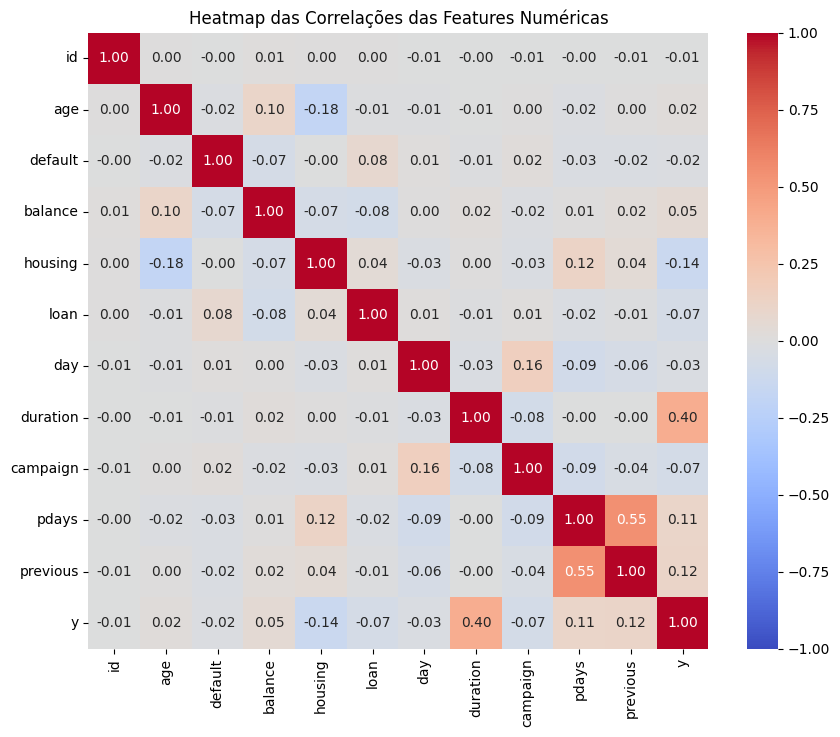

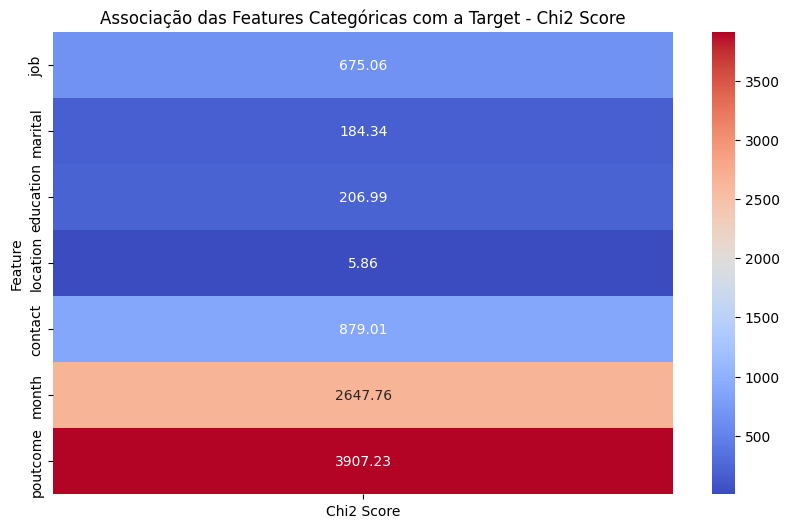

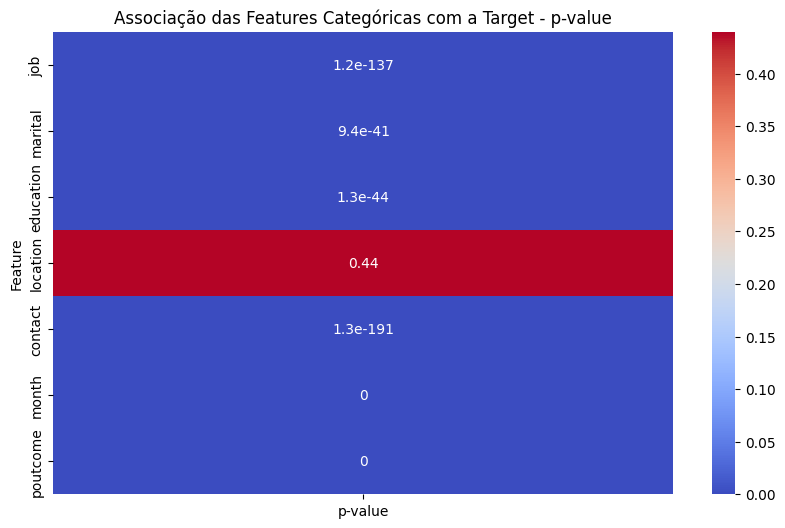

In [47]:
data = train_cleaning.copy()

label_encoder = LabelEncoder()

numerical_features = data.select_dtypes(include=['number']).columns.tolist()
categorical_features = data.select_dtypes(include=['object']).columns.tolist()

# Heatmap para as features numéricas
corr_matrix_num = data[numerical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_num, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Heatmap das Correlações das Features Numéricas')
plt.show()

# Medir associação para as features categóricas e calcular p-valores
chi2_values = []
p_values = []
for feature in categorical_features:
    contingency_table = pd.crosstab(data[feature], data['y'])
    chi2, p, _, _ = ss.chi2_contingency(contingency_table)
    chi2_values.append(chi2)
    p_values.append(p)

importance_df = pd.DataFrame({
    'Feature': categorical_features,
    'Chi2 Score': chi2_values,
    'p-value': p_values
})

importance_df.set_index('Feature', inplace=True)

plt.figure(figsize=(10, 6))
sns.heatmap(importance_df[['Chi2 Score']], annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Associação das Features Categóricas com a Target - Chi2 Score')
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(importance_df[['p-value']], annot=True, cmap='coolwarm', fmt='.2g')
plt.title('Associação das Features Categóricas com a Target - p-value')
plt.show()

In [48]:
train_cleaning.describe().round(2)

,id,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
count,39697.00,39697.00,39697.00,39697.00,39697.00,39697.00,39697.00,39697.00,39697.00,39697.00,39697.00,39697.00
mean,19994.82,40.88,0.02,1362.87,0.56,0.16,15.82,258.35,2.72,40.38,0.57,0.12
std,11548.23,10.47,0.13,2992.60,0.50,0.37,8.33,256.41,2.99,100.27,1.89,0.32
min,0.00,18.00,0.00,-8019.00,0.00,0.00,1.00,0.00,1.00,-1.00,0.00,0.00
25%,9994.00,33.00,0.00,86.00,0.00,0.00,8.00,103.00,1.00,-1.00,0.00,0.00
50%,19987.00,39.00,0.00,503.00,1.00,0.00,16.00,181.00,2.00,-1.00,0.00,0.00
75%,30000.00,48.00,0.00,1452.00,1.00,0.00,21.00,320.00,3.00,-1.00,0.00,0.00
max,39999.00,95.00,1.00,102127.00,1.00,1.00,31.00,4918.00,58.00,871.00,58.00,1.00


In [49]:
test_cleaning.describe().round(2)

,id,age,default,balance,housing,loan,day,duration,campaign,pdays,previous
count,5211.00,5211.00,5211.00,5211.00,5211.00,5211.00,5211.00,5211.00,5211.00,5211.00,5211.00
mean,42605.00,41.09,0.02,1382.35,0.56,0.16,15.70,470.18,2.82,38.92,0.53
std,1504.43,10.66,0.13,3072.29,0.50,0.37,8.28,4013.51,3.41,98.84,1.95
min,40000.00,8.00,0.00,-2093.00,0.00,0.00,1.00,-20.00,1.00,-1.00,0.00
25%,41302.50,33.00,0.00,82.50,0.00,0.00,8.00,101.00,1.00,-1.00,0.00
50%,42605.00,40.00,0.00,489.00,1.00,0.00,16.00,176.00,2.00,-1.00,0.00
75%,43907.50,49.00,0.00,1494.99,1.00,0.00,21.00,312.00,3.00,-1.00,0.00
max,45210.00,150.00,1.00,71188.00,1.00,1.00,31.00,75000.00,63.00,842.00,51.00


In [50]:
train_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39697 entries, 0 to 39999
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         39697 non-null  int64  
 1   age        39697 non-null  int64  
 2   job        39697 non-null  object 
 3   marital    39697 non-null  object 
 4   education  39697 non-null  object 
 5   location   39697 non-null  object 
 6   default    39697 non-null  int64  
 7   balance    39697 non-null  float64
 8   housing    39697 non-null  int64  
 9   loan       39697 non-null  int64  
 10  contact    39697 non-null  object 
 11  day        39697 non-null  int64  
 12  month      39697 non-null  object 
 13  duration   39697 non-null  int64  
 14  campaign   39697 non-null  int64  
 15  pdays      39697 non-null  int64  
 16  previous   39697 non-null  int64  
 17  poutcome   39697 non-null  object 
 18  y          39697 non-null  int64  
dtypes: float64(1), int64(11), object(7)
memory usage: 6

In [51]:
test_cleaning.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5211 entries, 0 to 5210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         5211 non-null   int64  
 1   age        5211 non-null   int64  
 2   job        5211 non-null   object 
 3   marital    5211 non-null   object 
 4   education  5211 non-null   object 
 5   location   5211 non-null   object 
 6   default    5211 non-null   int64  
 7   balance    5211 non-null   float64
 8   housing    5211 non-null   int64  
 9   loan       5211 non-null   int64  
 10  contact    5211 non-null   object 
 11  day        5211 non-null   int64  
 12  month      5211 non-null   object 
 13  duration   5211 non-null   int64  
 14  campaign   5211 non-null   int64  
 15  pdays      5211 non-null   int64  
 16  previous   5211 non-null   int64  
 17  poutcome   5211 non-null   object 
dtypes: float64(1), int64(10), object(7)
memory usage: 732.9+ KB


In [52]:
train_cleaning.head(100)

,id,age,job,marital,education,location,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,41,management,single,tertiary,unknown,0,4522.0,0,0,cellular,28,aug,55,1,-1,0,unknown,0
1,1,42,blue-collar,married,primary,unknown,1,398.0,1,0,unknown,16,may,251,4,-1,0,unknown,0
2,2,26,student,single,secondary,Lisboa,0,706.0,0,0,unknown,8,oct,118,1,105,2,other,0
3,3,54,management,married,tertiary,unknown,0,0.0,0,1,cellular,19,nov,307,3,-1,0,unknown,0
4,4,43,self-employed,married,secondary,Porto,0,918.0,1,0,unknown,6,may,193,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,40,administrator,divorced,secondary,Porto,0,1232.0,0,0,cellular,5,feb,217,1,-1,0,unknown,0
96,96,56,administrator,married,secondary,unknown,0,1290.0,0,0,unknown,12,jun,243,1,-1,0,unknown,0
97,97,65,entrepreneur,married,tertiary,unknown,0,2331.0,0,0,telephone,11,aug,425,1,183,2,success,1
98,98,40,administrator,married,secondary,Braga,0,3138.0,0,0,cellular,12,aug,238,1,-1,0,unknown,0


In [53]:
test_cleaning.head()

,id,age,job,marital,education,location,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,40000,26,self-employed,single,tertiary,Porto,0,-101.000000,0,1,cellular,29,jan,172,1,-1,0,unknown
1,40001,47,technician,married,secondary,unknown,0,1167.000000,1,0,cellular,2,feb,139,3,73,2,success
2,40002,35,self-employed,married,tertiary,unknown,0,2427.000000,0,0,cellular,12,jul,210,3,158,7,other
3,40003,54,technician,divorced,secondary,unknown,0,1796.723248,0,0,cellular,30,jan,86,1,-1,0,unknown
4,40004,27,blue-collar,single,secondary,Braga,0,-208.000000,1,0,unknown,21,may,127,2,-1,0,unknown


In [54]:
train_df = train_cleaning
test_df = test_cleaning

In [56]:
train_csv_path = os.path.join('../data/bank_train.csv')
test_csv_path = os.path.join('../data/bank_test.csv')

train_df.to_csv(train_csv_path, index=False)
test_df.to_csv(test_csv_path, index=False)
